## Gemini Pro Vision Image 분석

Feedback : shins777@gmail.com. 

이 Colab 은 다양한 비즈니스 요구사항에 적용할수 있는 이미지 분석에 대한 예제입니다.
Gemini Pro vision을 활용해서 이미지를 분석합니다.

* 코드는 Gemini Pro API 기반으로 처리하며 그에 따른 API는 아래 링크 참고하세요.  
    * 자세한 정보는 [README.md](https://github.com/shins777/google_gen_ai_sample/blob/main/notebook/gemini/README.md) 파일 참고하세요.

이 Colab은 구글의 Image 생성을 위한 솔루션인 Imagen에 대한 예제입니다.
현재(2024년 3월 8일기준) Imagen 2.0 버전은 특정 고객만 사용할 수 있는 Private preview 상태입니다.  참고하세요. 만일 해당 기능을 사용하시기 원하시면 구글에 문의 해주세요.

구글은 텍스트와 마찬가지로 이미지 생성에서 있어서 "모델에 사용된 training 데이터에 대해 고객이 책임지지 않음" 과 "해당 모델에 의해서 생성된 컨텐트에 대해서 고객이 책임지지 않는다는" 두가지의 고객의 면책을 보장합니다.

#라이브러리 설치
*   Langchain library : https://github.com/langchain-ai/langchain
*   Langchain Vertex AI API : https://api.python.langchain.com/en/stable/google_vertexai_api_reference.html
*   https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/image_generation.ipynb


In [1]:
!pip install --upgrade --quiet langchain langchain-core langchain-google-vertexai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.5/807.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 8.5 MB/s eta 0:00:00


생성된 이미지 배치를 위한 함수.

In [2]:
import math
import matplotlib.pyplot as plt

def display_images_in_grid(images):
    nrows = math.ceil(len(images) / 4)
    ncols = min(len(images) + 1, 4)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i]._pil_image)
            ax.set_aspect("equal")
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.axis("off")
    plt.tight_layout()
    plt.show()

#GCP 사용자 인증

In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_google_vertexai.llms import VertexAI
from langchain_google_vertexai import HarmBlockThreshold, HarmCategory

from vertexai.preview.vision_models import ImageGenerationModel


#모델 초기화 및 실행

In [5]:
project="ai-hangsik"
location="asia-northeast3"

# Image Generation

In [6]:
imagen_model_name="imagegeneration@005"

In [7]:
import vertexai

vertexai.init(project=project, location=location)
generation_model = ImageGenerationModel.from_pretrained(imagen_model_name)


이미지를 생성하기 위해서는 마치 사진을 찍는것처럼 Prompting을 해주시는것이 좋습니다.
아래는 Image genearation 에서 좀더 효율적으로 Prompting 하는 방법을 나타내주는 메뉴얼 입니다. 참고하세요.
https://cloud.google.com/vertex-ai/docs/generative-ai/image/img-gen-prompt-guide?hl=ko

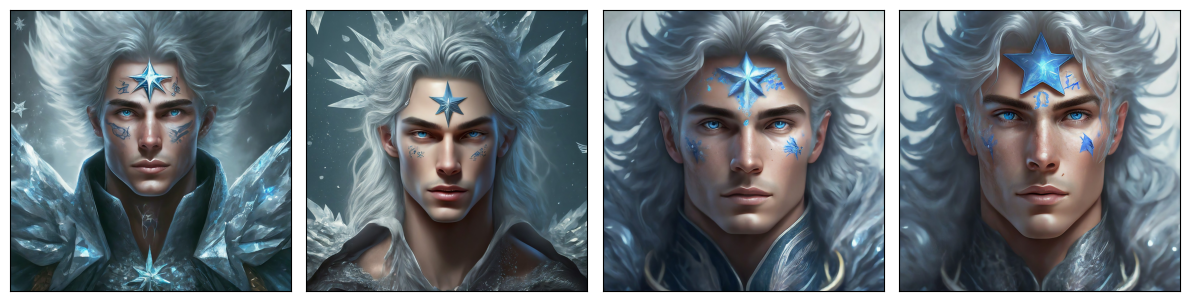

In [8]:
prompt = "A beautiful ice prince with silver hair and It has 'Star' written on his forehead, fantasy concept art style"

response = generation_model.generate_images(
    prompt=prompt,
    number_of_images=4,
    seed=42,
)

display_images_in_grid(response.images)


# Image captioning

In [9]:
from vertexai.preview.vision_models import ImageCaptioningModel

image_captioning_model = ImageCaptioningModel.from_pretrained("imagetext@001")


In [10]:
! gsutil cp "gs://github-repo/img/vision/google-cloud-next.jpeg" .


Copying gs://github-repo/img/vision/google-cloud-next.jpeg...
/ [1 files][240.3 KiB/240.3 KiB]                                                
Operation completed over 1 objects/240.3 KiB.                                    


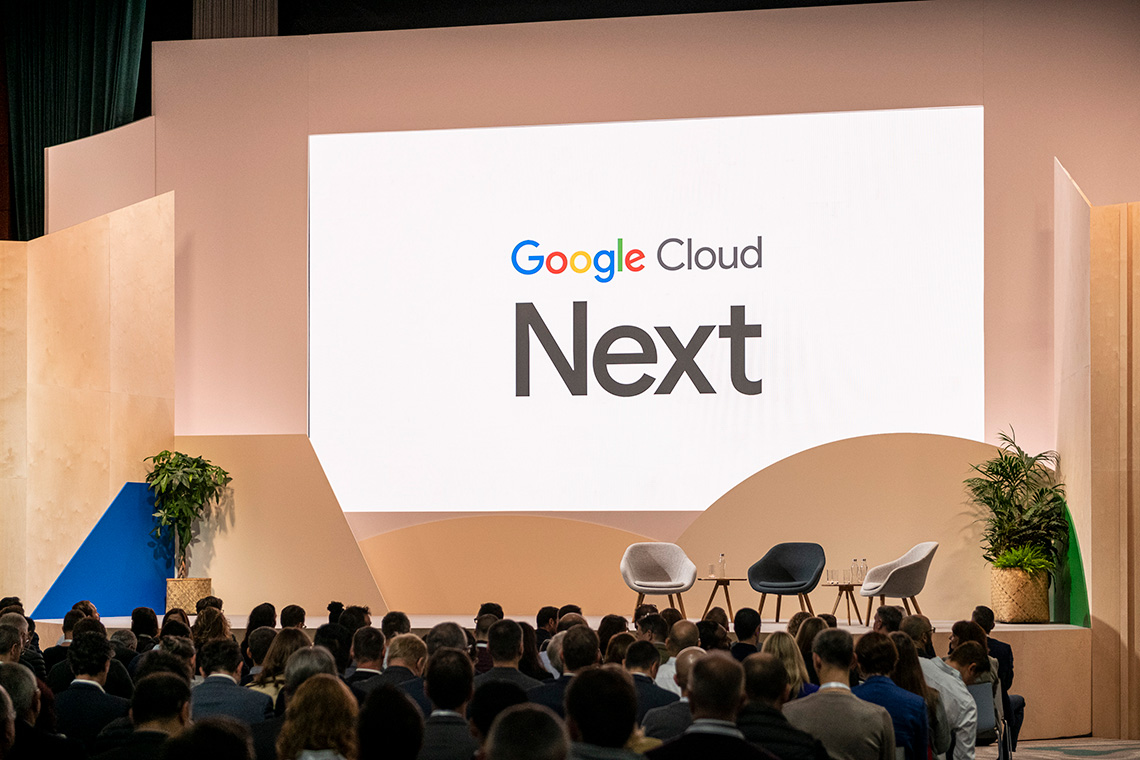

In [11]:
from vertexai.preview.vision_models import Image

# Load the image file as Image object
cloud_next_image = Image.load_from_file("google-cloud-next.jpeg")
cloud_next_image.show()

In [12]:
# Get a caption from the image
image_captioning_model.get_captions(
    image=cloud_next_image,
)

['a group of people sitting in front of a google cloud next sign']

In [13]:
# Get 3 captions from the image
image_captioning_model.get_captions(
    image=cloud_next_image,
    number_of_results=3,
    language="en",

)

['a group of people sitting in front of a google cloud next sign',
 'a group of people are sitting in front of a google cloud next sign',
 'a group of people sitting in front of a google cloud next stage']

# Imange Question and Answer

In [14]:
from vertexai.preview.vision_models import ImageQnAModel

image_qna_model = ImageQnAModel.from_pretrained("imagetext@001")

In [15]:
# Download an image from Google Cloud Storage

! gsutil cp "gs://github-repo/img/vision/google-cloud-next.jpeg" .

Copying gs://github-repo/img/vision/google-cloud-next.jpeg...
/ [1 files][240.3 KiB/240.3 KiB]                                                
Operation completed over 1 objects/240.3 KiB.                                    


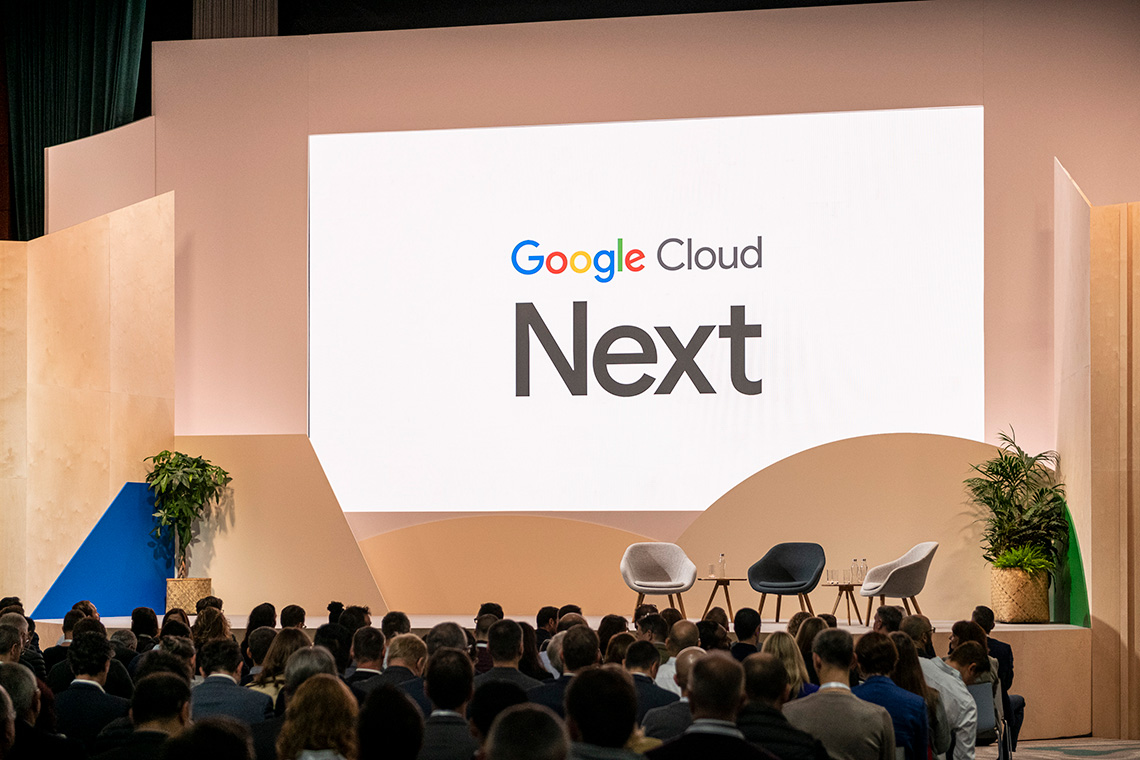

In [16]:
from vertexai.preview.vision_models import Image

# Load the image file as Image object
cloud_next_image = Image.load_from_file("google-cloud-next.jpeg")
cloud_next_image.show()

In [17]:
# Ask a question about the image
image_qna_model.ask_question(
    image=cloud_next_image, question="What is happening in this image?"
)

['google cloud next']

In [18]:
# Get 3 answers from the image
image_qna_model.ask_question(
    image=cloud_next_image,
    question="What are the people in the image doing?",
    number_of_results=3,
)

['sitting', 'watching', 'watching a presentation']